# Librerías
---

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

### Funciones y Variables
---

In [29]:
m = 1
L = 1
g = 9.81
h = 0.01
theta_0 = np.radians(10)
theta_vel = 0
beta = 0.002
gamma = 0.5

r0 = np.array([theta_0, 0])
t = np.linspace(0,1)

In [30]:
def ddtheta(theta,dtheta):
    return (2*g/L-dtheta**2*np.cos(theta))*np.sin(theta)/(1/3 + np.sin(theta)**2)

def ddotthetadt(theta,dtheta):
    return (2*g/L-dtheta**2*np.cos(theta))*np.sin(theta)/(1/3 + np.sin(theta)**2)

def theta(theta,dtheta,ddtheta,t):
    return theta + dtheta*t + 0.5*ddtheta*t**2


def GetEuler2System(f0,f1,init_cond,t):
    h = t[1] - t[0]
    theta = np.zeros_like(t)
    dtheta = np.zeros_like(t)

    theta[0] = init_cond[0]
    dtheta[0] = init_cond[1]

    K1 = np.zeros(3)
    K2 = np.zeros(3)

    for i in range(1,len(t)):
        K1[0] = f0(theta[i-1],dtheta[i-1],ddotthetadt(theta[i-1],dtheta[i-1]),t[i-1])
        K1[1] = f1(theta[i-1],dtheta[i-1])

        K2[0] = f0(theta[i-1]+h*K1[0],dtheta[i-1]+h*K1[1],ddotthetadt(theta[i-1]+h*K1[0],dtheta[i-1]+h*K1[1]),t[i-1])
        K2[1] = f1(theta[i-1]+h*K1[0],dtheta[i-1]+h*K1[1])

        theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
        dtheta[i] = dtheta[i-1] + 0.5*h*(K1[1]+K2[1])

    return theta,dtheta

### Gráfica
---

In [31]:
theta,dtheta = GetEuler2System(theta,ddtheta,r0,t)

x = (L/2)*np.sin(theta)
y = (L/2)*np.cos(theta)

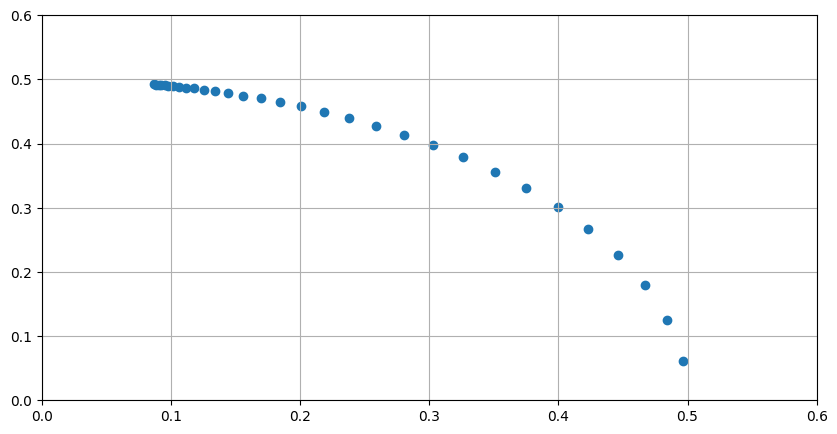

In [32]:
figure = plt.figure(figsize=(10,5))
ax1 = figure.add_subplot(111)
ax1.set_xlim(0,0.6)
ax1.set_ylim(0,0.6)
ax1.grid()
ax1.scatter(x,y)